# Get data:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import zipfile
import random
import shutil
from shutil import copyfile
from os import getcwd

In [ ]:
train_label = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/train.csv')
test_label = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/test.csv')

In [ ]:
print(train_label.shape)
print(test_label.shape)

(364, 2)
(156, 1)


In [ ]:
train_label.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [ ]:
train_label = train_label.sort_values('Image',ascending=True)

In [ ]:
train_label.head()

,Image,target
254,1.jpg,kathak
356,10.jpg,kathak
183,100.jpg,manipuri
342,101.jpg,manipuri
47,102.jpg,manipuri


bharatanatyam


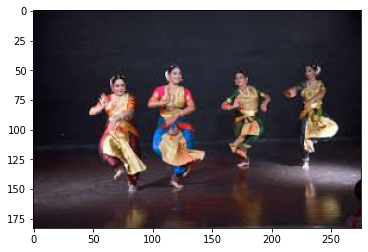

In [ ]:
img = Image.open('/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/train/163.jpg')
plt.imshow(img)
print(train_label['target'][1])

# Creating folders and storing images to file 

In [ ]:
train_label['target'].value_counts()

mohiniyattam     50
odissi           49
kathakali        47
bharatanatyam    47
kuchipudi        46
sattriya         45
kathak           44
manipuri         36
Name: target, dtype: int64

In [ ]:
base = '/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances'
base_train = base + "/training"
base_valid = base + "/validation"
file_list = []

In [ ]:
all_file1 = ['mohiniyattam','odissi','bharatanatyam','kathakali','kuchipudi','sattriya','kathak','manipuri']
for t_name in all_file1:
  file_list.append(base_train + "/" + t_name)

In [ ]:
for t_name in all_file1:
  file_list.append(base_valid + "/" + t_name)

In [ ]:
os.mkdir(base)
os.mkdir(base_train)
os.mkdir(base_valid)

In [ ]:
file_list

['/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/training/mohiniyattam',
 '/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/training/odissi',
 '/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/training/bharatanatyam',
 '/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/training/kathakali',
 '/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/training/kuchipudi',
 '/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/training/sattriya',
 '/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/training/kathak',
 '/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/training/manipuri',
 '/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/validation/mohiniyattam',
 '/content/driv

In [ ]:
for file in file_list:
  try:
    os.mkdir(file)
    print(file + ' created')
  except:
    print(file + ' failed')

/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/training/mohiniyattam created
/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/training/odissi created
/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/training/bharatanatyam created
/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/training/kathakali created
/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/training/kuchipudi created
/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/training/sattriya created
/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/training/kathak created
/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/training/manipuri created
/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/validation/

In [ ]:
train_label['target'].value_counts()

mohiniyattam     50
odissi           49
kathakali        47
bharatanatyam    47
kuchipudi        46
sattriya         45
kathak           44
manipuri         36
Name: target, dtype: int64

In [ ]:
train_label_mohiniyattam = train_label[train_label['target']=='mohiniyattam']
train_label_odissi = train_label[train_label['target']=='odissi']
train_label_bharatanatyam = train_label[train_label['target']=='bharatanatyam']
train_label_kathakali = train_label[train_label['target']=='kathakali']
train_label_kuchipudi = train_label[train_label['target']=='kuchipudi']
train_label_sattriya = train_label[train_label['target']=='sattriya']
train_label_kathak = train_label[train_label['target']=='kathak']
train_label_manipuri = train_label[train_label['target']=='manipuri']


In [ ]:
SOURCE = '/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/train'

In [ ]:
def list_images(train_label_dance,SOURCE,DEST_train,DEST_valid):
  train_img_dance = list(train_label_dance.Image)
  len_train_img_dance = len(train_img_dance)
  split_point = int(len_train_img_dance*0.7)
  shuffled = random.sample(train_img_dance,len_train_img_dance)
  train_set = shuffled[:split_point]
  valid_set = shuffled[split_point:]

  for img in train_set:
    copyfile(SOURCE + "/" + img, DEST_train + '/' + img)  
  
  for img in valid_set:
    copyfile(SOURCE + "/" + img, DEST_valid + '/' + img)
  return train_img_dance

In [ ]:
train_image_mohiniyattam = list_images(train_label_mohiniyattam,SOURCE,file_list[0],file_list[8])
train_image_odissi = list_images(train_label_odissi,SOURCE,file_list[1],file_list[9])
train_image_bharatanatyam = list_images(train_label_bharatanatyam,SOURCE,file_list[2],file_list[10])
train_image_kathakali = list_images(train_label_kathakali,SOURCE,file_list[3],file_list[11])
train_image_kuchipudi = list_images(train_label_kuchipudi,SOURCE,file_list[4],file_list[12])
train_image_sattriya = list_images(train_label_sattriya,SOURCE,file_list[5],file_list[13])
train_image_kathak = list_images(train_label_kathak,SOURCE,file_list[6],file_list[14])
train_image_manipuri = list_images(train_label_manipuri,SOURCE,file_list[7],file_list[15])

# TF Model

In [ ]:
#AUTO = tf.data.experimental.AUTOTUNE
#batch_size = 64 * tpu_strategy.num_replicas_in_sync

In [ ]:
# using transfer learning:
from tensorflow.keras.applications.inception_v3 import InceptionV3
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-06-27 13:26:57--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 108.177.15.128, 173.194.76.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  29.3MB/s    in 2.9s    

2020-06-27 13:27:00 (29.3 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
TRAINING_DIR = '/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/training'
VALIDATION_DIR = '/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/validation'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,rotation_range=40,height_shift_range=0.2,
                                   width_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
                                 horizontal_flip=True,fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_gen = train_datagen.flow_from_directory(TRAINING_DIR,target_size =(300,300),batch_size=16,class_mode='categorical')

valid_gen = valid_datagen.flow_from_directory(VALIDATION_DIR,target_size =(300,300),batch_size=16,class_mode='categorical')

Found 251 images belonging to 8 classes.
Found 113 images belonging to 8 classes.


In [ ]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
pre_trained_model = InceptionV3(input_shape=(300,300,3),include_top=False,weights='imagenet')
#pre_trained_model.load_weights(local_weights_file)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False


#pre_trained_model.summary()

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output
last_layer.output_shape

(None, 17, 17, 768)

In [ ]:
# batchnorm after:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.BatchNormalization()(x)

kernel_regularizer = tf.keras.regularizers.l2(0.001)
init = 'he_normal'
kernel_constraint=tf.keras.constraints.max_norm(1.)

x = tf.keras.layers.Dense(152,activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(152,activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(152,activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(152,activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(152,activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(152,activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(8,activation='softmax')(x)

model = tf.keras.Model(pre_trained_model.input,x)

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
class mycallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epochs,logs={}):
    if (logs.get('accuracy')>0.98):
      self.model.stop_training = True
callback = mycallbacks()

In [ ]:
history = model.fit(train_gen,epochs=25,verbose=1,validation_data=valid_gen,validation_steps=20,callbacks=[callback],use_multiprocessing=False,workers=16) 

Epoch 1/25
16/16 [==============================] - 11s 684ms/step - loss: 0.6760 - accuracy: 0.7649 - val_loss: 0.9817 - val_accuracy: 0.6931
Epoch 2/25
16/16 [==============================] - 11s 677ms/step - loss: 0.6777 - accuracy: 0.7888 - val_loss: 0.9375 - val_accuracy: 0.6931
Epoch 3/25
16/16 [==============================] - 11s 705ms/step - loss: 0.6004 - accuracy: 0.7888 - val_loss: 0.9370 - val_accuracy: 0.7276
Epoch 4/25
16/16 [==============================] - 11s 660ms/step - loss: 0.7155 - accuracy: 0.7450 - val_loss: 0.9061 - val_accuracy: 0.7483
Epoch 5/25
16/16 [==============================] - 11s 675ms/step - loss: 0.6338 - accuracy: 0.7888 - val_loss: 0.9119 - val_accuracy: 0.7379
Epoch 6/25
16/16 [==============================] - 11s 676ms/step - loss: 0.7522 - accuracy: 0.7610 - val_loss: 0.9549 - val_accuracy: 0.6966
Epoch 7/25
16/16 [==============================] - 11s 699ms/step - loss: 0.6707 - accuracy: 0.7729 - val_loss: 0.8970 - val_accuracy: 0.7207

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Training and validation loss')

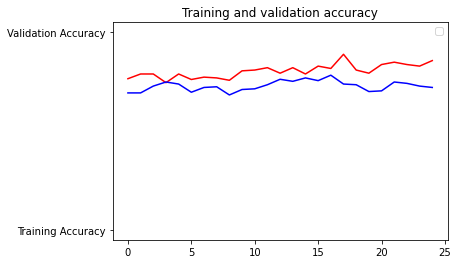

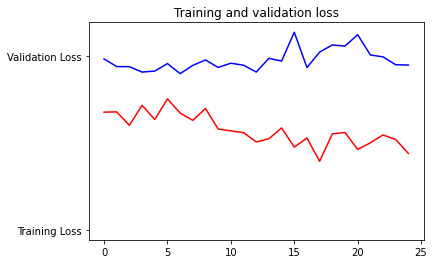

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.yticks()
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")

plt.title('Training and validation loss')

<Figure size 432x288 with 0 Axes>

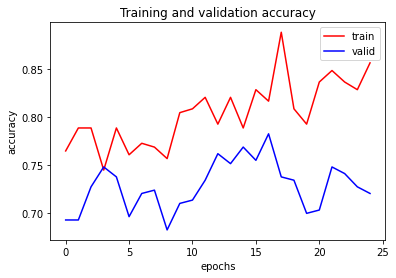

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(acc, 'r')
plt.plot(val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend(['train','valid'])
plt.figure()

<Figure size 432x288 with 0 Axes>

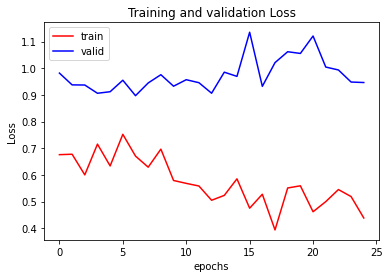

<Figure size 432x288 with 0 Axes>

In [ ]:

plt.plot(loss, 'r')
plt.plot(val_loss, 'b')
plt.title('Training and validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train','valid'])
plt.figure()

In [ ]:
files = os.listdir('/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/Dances/training')
file_order = sorted(files)
print(file_order)

['bharatanatyam', 'kathak', 'kathakali', 'kuchipudi', 'manipuri', 'mohiniyattam', 'odissi', 'sattriya']


[2.1385586e-37 0.0000000e+00 0.0000000e+00 3.6318681e-19 1.0000000e+00
 5.0093693e-28 7.7121423e-17 1.1916628e-31]
4
This image is: manipuri


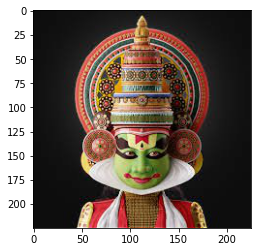

In [ ]:
from keras.preprocessing import image
test_path ='/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/test/202.jpg'
test_image = image.load_img(test_path,target_size=(300,300))
x = image.img_to_array(test_image)
x = np.expand_dims(x,axis=0)

test_image = np.vstack([x])
classes = model.predict(test_image,batch_size=10)
print(classes[0])
print(np.argmax(classes[0]))
res = np.argmax(classes[0])
print('This image is:',file_order[res])
plt.imshow(Image.open(test_path))

In [ ]:
test_set = '/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/test'
list_test_img=[]

In [ ]:
for img in os.listdir(test_set):
  test_image = image.load_img(test_set+'/'+img,target_size=(300,300))
  x = image.img_to_array(test_image)
  x = np.expand_dims(x,axis=0)
  test_image = np.vstack([x])
  list_test_img.append(test_image)

In [ ]:
sample_1= test_set + '/' + os.listdir(test_set)[0]
sample_1

'/content/drive/My Drive/Colab Notebooks/Indian Dance forms HackerEarth/dataset/test/508.jpg'

In [ ]:
list_test_img = np.array(list_test_img)
file_order = np.array(file_order)

In [ ]:
test_history = model.evaluate(list_test_img,file_order,batch_size=16,verbose=1)